In [1]:
import torch

# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0, 1]
    rotation_range=20,      # Rotate images up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally up to 20% of the width
    height_shift_range=0.2, # Shift images vertically up to 20% of the height
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Fill missing pixels using the nearest value
)

# Define your data generators for training, validation, and testing
batch_size = 32

train_generator = datagen.flow_from_directory(
    'C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\Train',
    target_size=(256, 256),  # Adjust the size as needed
    batch_size=batch_size,
    class_mode='binary',     # Use binary classification for detection
    subset='training'
)

test_generator = datagen.flow_from_directory(
    'C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\Test',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)
print("done")

Found 155 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
done


In [26]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directories
train_dir = 'C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\Train'  # Change to your actual train directory
test_dir = 'C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\Test'    # Change to your actual test directory

# Define image size and batch size
img_size = (256, 256)
batch_size = 32

# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Create an InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for binary classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=100)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy: {:.2f}%".format(test_acc * 100))


Found 125 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Epoch 1/100
4/4 [==============================] - 25s 6s/step - loss: 1.1548 - accuracy: 0.4960 - val_loss: 1.1171 - val_accuracy: 0.5667
Epoch 2/100
4/4 [==============================] - 19s 5s/step - loss: 0.8439 - accuracy: 0.6000 - val_loss: 0.7756 - val_accuracy: 0.4333
Epoch 3/100
4/4 [==============================] - 18s 5s/step - loss: 0.7638 - accuracy: 0.4560 - val_loss: 0.6983 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 18s 5s/step - loss: 0.6982 - accuracy: 0.5920 - val_loss: 0.7651 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 18s 5s/step - loss: 0.6974 - accuracy: 0.5760 - val_loss: 0.7133 - val_accuracy: 0.5333
Epoch 6/100
4/4 [==============================] - 19s 5s/step - loss: 0.6535 - accuracy: 0.6320 - val_loss: 0.7046 - val_accuracy: 0.4667
Epoch 7/100
4/4 [==============================] - 19s 5s/step - loss: 0.6606 - accuracy: 0.6240 - val_loss: 0.6688 - val_accuracy: 0.6333
Epoch 8/100
4/4 [==========

In [29]:
# Save the model with the name "train1.h5"
model.save('train2.h5')

C:\Users\ppk_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 885ms/step


TypeError: Invalid shape (1,) for image data

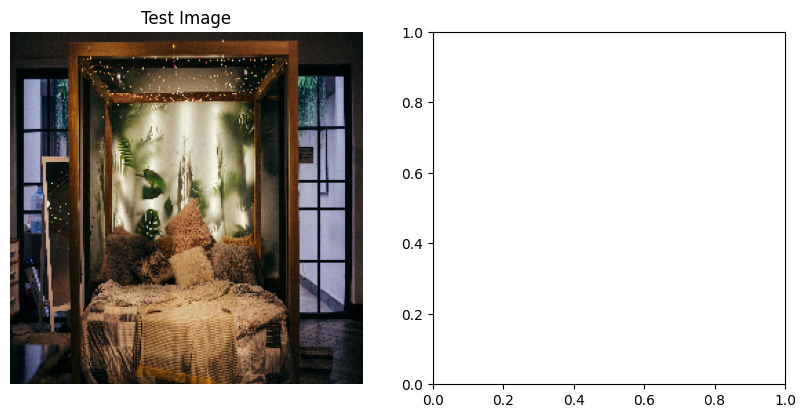

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the pretrained model
model = load_model('train1.h5')  # Replace with the path to your saved model

# Load an image from a specific folder for testing
test_image_path = 'C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\Test\\Embedded\\emb83.jpg'  # Replace with the path to your test image

# Load and preprocess the test image
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
test_image = cv2.resize(test_image, (256, 256))  # Resize to match the input shape of your model
test_image = test_image / 255.0  # Normalize the image

# Perform inference using the model
input_image = np.expand_dims(test_image, axis=0)  # Add an extra dimension for batch
predictions = model.predict(input_image)

# Display the test image and model's output in the notebook
plt.figure(figsize=(10, 5))

# Display the test image
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title('Test Image')
plt.axis('off')

# Display the model's output (you may need to customize this based on your output)
plt.subplot(1, 2, 2)
plt.imshow(predictions[0])  # Assuming predictions is the output from your model
plt.title('Model Output')
plt.axis('off')

plt.show()


In [ ]:
#Extraction

In [43]:
import cv2
import soundfile as sf
import numpy as np

# Define the paths to the directory containing steganographic images and the audio file
image_dir = 'C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\Embedded'
audio_file = 'C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\test.wav'

# Load the audio data
audio_data, sample_rate = sf.read(audio_file)

# Create a list to store the training data pairs
training_data = []

# Load and preprocess steganographic images, and pair them with the audio data
for image_filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    image = image / 255.0  # Normalize the image

    # Pair the image with the audio data
    training_data.append((image, audio_data))

# Shuffle the training data if needed
np.random.shuffle(training_data)

# Split the dataset into features (X) and labels (y)
X = np.array([item[0] for item in training_data])
y = np.array([item[1] for item in training_data])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (84, 256, 256, 3)
Shape of y: (84, 914401, 2)


In [36]:
import soundfile as sf
import numpy as np

# Load the WAV audio file
audio_file = 'C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\test.wav'
audio_data, sample_rate = sf.read(audio_file)

# Save the audio data as a NumPy array in .npy format
np.save('C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\test.npy', audio_data)

In [38]:
import numpy as np

# Load and preprocess your audio data
target_audio_data = np.load('C:\\Users\\ppk_2\\Desktop\\College\\DeepLearning_Lab\\Steganogrpahy\\Audio\\test.npy')  # Load your target audio data

# Check the shape of the target audio data
print("Shape of target audio data:", target_audio_data.shape)


Shape of target audio data: (914401, 2)


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the extraction model
output_units = 914401*2

extraction_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),

    dense_layer_output = tf.reshape(dense_layer_output, [-1, 914401, 2])
    
    Dense(output_units, activation='linear'),
    # Reshape the output of the dense layer
    tf.reshape(output_units, [-1, 914401, 2]),

    
])

# Compile the extraction model (you may need to customize the loss and metrics)
extraction_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the extraction model
extraction_model.fit(X, y, epochs=50, validation_split=0.2)

# Save the trained extraction model
extraction_model.save('extraction_model.h5')


InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 1 values, but the requested shape requires a multiple of 1828802 [Op:Reshape]

In [64]:
import tensorflow as tf

# Define the dense layer
dense_layer = Dense(1536, activation='relu')

# Create a random tensor for demonstration (replace this with your actual data)
random_data = tf.random.normal((1, 128))

# Pass the data through the dense layer
dense_layer_output = dense_layer(random_data)

# Calculate the required size based on the target shape
required_size = 768 * 2

# Check if the size of the output matches the required size
if dense_layer_output.shape[-1] != required_size:
    raise ValueError(f"The size of the dense layer output ({dense_layer_output.shape[-1]}) "
                     f"does not match the required size ({required_size}).")

# Reshape the output of the dense layer
reshaped_output = tf.reshape(dense_layer_output, (-1, 768, 2))

# Print the shape of the reshaped output
print(reshaped_output.shape)


(1, 768, 2)
